About Breast Cancer Wisconsin (Diagnostic) Data Set Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29



In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
import kerastuner as kt
from kerastuner.engine.hyperparameters import HyperParameters
hp = HyperParameters()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
df = pd.read_csv('data (1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


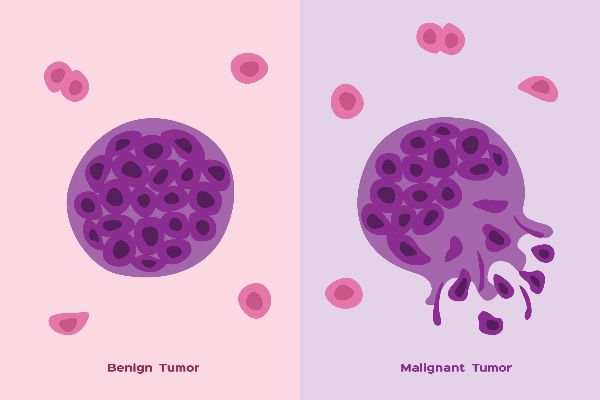

In [21]:
import cv2
from google.colab.patches import cv2_imshow

# Open the image.
img = cv2.imread('/content/shutterstock_1493059916.jpg')

# Resize the image to a new size (e.g., width=500, height=500).
resized_img = cv2.resize(img, (600, 400))

# Show the resized image.
cv2_imshow(resized_img)

In [17]:
#Benign - Non canecrous
#Maligant - Cancerous

In [23]:
df['diagnosis'].value_counts()  #almost same count

,count
diagnosis,
B,357
M,212


In [24]:
df.drop(columns=['id', 'Unnamed: 32'], inplace=True)

In [25]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [27]:
df.duplicated().sum()

0

In [29]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [37]:
df['diagnosis'].replace({'B': 0, 'M': 1}, inplace = True)

<ipython-input-37-af8e29d7b160>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['diagnosis'].replace({'B': 0, 'M': 1}, inplace = True)
<ipython-input-37-af8e29d7b160>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'].replace({'B': 0, 'M': 1}, inplace = True)


In [38]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
df.corr()['diagnosis'].sort_values(ascending = False)

#top 5 features -
# concave points_worst	0.793566
# perimeter_worst	0.782914
# concave points_mean	0.776614
# radius_worst	0.776454
# perimeter_mean	0.742636

,diagnosis
diagnosis,1.000000
concave points_worst,0.793566
perimeter_worst,0.782914
concave points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


In [105]:
X = df.drop(columns=['diagnosis'], axis =1)
y = df['diagnosis']

In [106]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [107]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [108]:
X_train_scaled

array([[ 0.72851777,  0.50730223,  0.75989259, ...,  1.48205616,
         1.18703863,  0.6485273 ],
       [ 0.93168419,  0.9069084 ,  0.80209493, ..., -0.49357745,
        -0.74923731, -1.0295767 ],
       [ 0.26123501, -0.59637196,  0.28427219, ..., -0.19136688,
        -1.20787287,  0.08989314],
       ...,
       [-0.56884492, -1.22908173, -0.62223411, ..., -1.48535639,
        -1.01441205, -1.29265762],
       [ 0.20899222, -0.54879979,  0.1222152 , ..., -0.53459729,
        -0.62749042, -0.85785862],
       [-0.92583733,  0.50016641, -0.84801664, ...,  0.43946855,
         0.10465871,  0.6716432 ]])

In [109]:
X_train_scaled.shape

(455, 30)

In [131]:
X_test_scaled

array([[-0.66752575, -0.07307816, -0.69566619, ..., -0.6989874 ,
        -0.61081276, -0.2161173 ],
       [-0.7633042 ,  1.11384731, -0.73744651, ..., -0.27325118,
        -1.31627764,  0.1906124 ],
       [ 2.63247733,  1.83694419,  2.59569446, ...,  2.25583951,
         0.33647814,  0.16034158],
       ...,
       [ 1.46281925,  0.77132774,  1.49843357, ...,  0.88074259,
         0.48657705,  0.45974748],
       [-1.07385858, -0.9008338 , -1.07084501, ..., -1.07950858,
        -0.47739151, -0.06421284],
       [-0.19734061,  2.13189161, -0.25760588, ..., -0.87487551,
        -0.34563802, -0.72907005]])

In [110]:
Y_train

,diagnosis
24,1
261,1
500,0
92,0
482,0
...,...
471,0
213,1
316,0
434,0


Now that we have prepared data, we will build neural network

Without hyperparameter tuning

In [162]:
#setting up layers for NN


model = Sequential()


model.add(Dense(30, activation='relu', input_dim=30))
model.add(Dropout(0.2))  #adding a dropout layer to avoid overfitting #random p value
#model.add(BatchNormalization())
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.1))
#model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


callbacks = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0.01,
                          patience = 20,
                          verbose = 1, mode = 'auto',
                          baseline = None,
                          restore_best_weights = False)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,411 (5.51 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

input_dim - number of columns of the dataset

output_dim - number of outputs to be fed to the next layer, if any

activation - activation function which is ReLU in this case

init - the way in which weights should be provided to an ANN

The ReLU function is f(x)=max(0,x). Usually this is applied element-wise to the output of some other function, such as a matrix-vector product. In MLP usages, rectifier units replace all other activation functions except perhaps the readout layer. But I suppose you could mix-and-match them if you'd like. One way ReLUs improve neural networks is by speeding up training. The gradient computation is very simple (either 0 or 1 depending on the sign of x). Also, the computational step of a ReLU is easy: any negative elements are set to 0.0 -- no exponentials, no multiplication or division operations. Gradients of logistic and hyperbolic tangent networks are smaller than the positive portion of the ReLU. This means that the positive portion is updated more rapidly as training progresses. However, this comes at a cost. The 0 gradient on the left-hand side is has its own problem, called "dead neurons," in which a gradient update sets the incoming values to a ReLU such that the output is always zero; modified ReLU units such as ELU (or Leaky ReLU etc.) can minimize this. Source : StackExchange

In [163]:
history = model.fit(X_train_scaled, Y_train, validation_data = [X_test_scaled, Y_test], epochs = 100, callbacks = callbacks)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.5199 - loss: 0.6883 - val_accuracy: 0.8684 - val_loss: 0.5434
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8320 - loss: 0.5216 - val_accuracy: 0.9386 - val_loss: 0.3968
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8933 - loss: 0.3995 - val_accuracy: 0.9649 - val_loss: 0.2934
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9402 - loss: 0.3049 - val_accuracy: 0.9737 - val_loss: 0.2244
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9315 - loss: 0.2410 - val_accuracy: 0.9737 - val_loss: 0.1789
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9278 - loss: 0.2367 - val_accuracy: 0.9737 - val_loss: 0.1536
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9473 - loss: 0.1847 - val_accuracy: 0.9737 - val_loss: 0.1342
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9656 - loss: 0.1425 - val_accuracy: 0.9737 - 

Stopped at 23th epoch (with patience of 20) where validation accuracy is 0.93

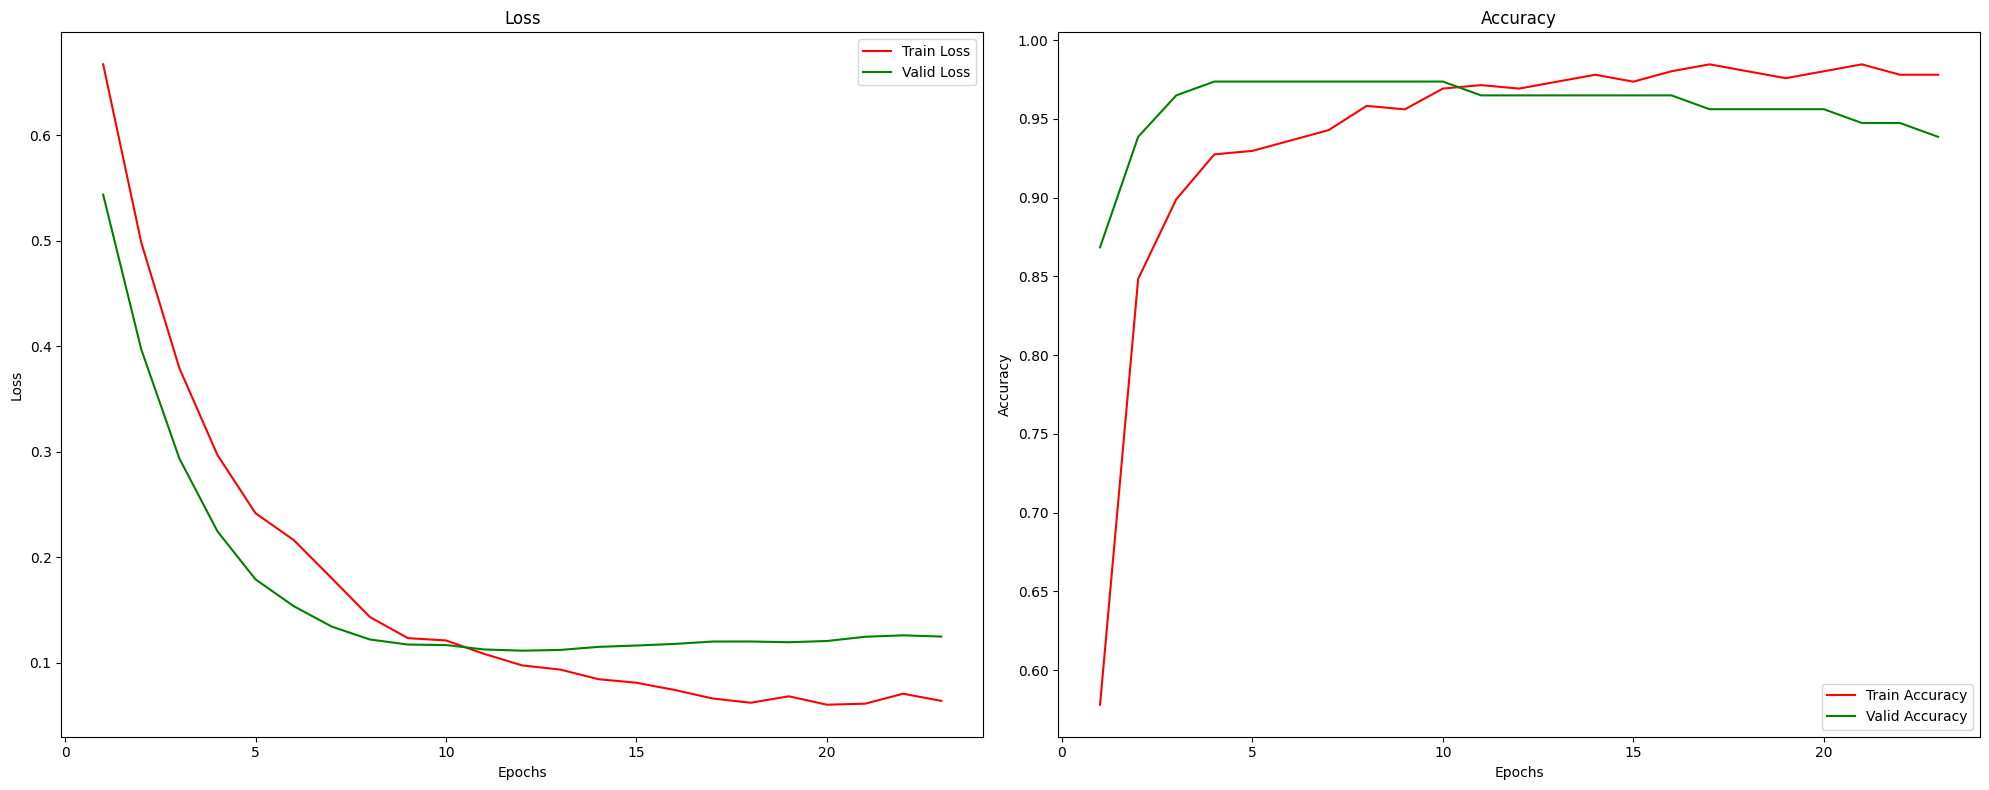

In [164]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

We can see that the model has early stopped at 23nd epoch - where val-loss is minimised to 0.12 - after that val-accuracy is also flat

In [165]:
y_prob = model.predict(X_test_scaled)
y_prob

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([[4.86217788e-04],
       [1.58528239e-02],
       [1.00000000e+00],
       [9.99730349e-01],
       [1.19996967e-05],
       [9.99998808e-01],
       [9.99998927e-01],
       [9.42848146e-01],
       [5.39712200e-04],
       [2.59003136e-04],
       [7.29908273e-02],
       [1.31984754e-03],
       [3.31710442e-03],
       [4.34302427e-02],
       [1.05431369e-02],
       [9.98321116e-01],
       [9.79867756e-01],
       [1.83458067e-03],
       [1.59177859e-03],
       [9.95622933e-01],
       [9.78569567e-01],
       [5.76718040e-02],
       [1.00000000e+00],
       [9.99999642e-01],
       [2.03608506e-05],
       [7.35341804e-04],
       [9.99995947e-01],
       [9.17298603e-05],
       [3.30487121e-04],
       [9.99988794e-01],
       [9.99994755e-01],
       [3.25060844e-01],
       [3.50899626e-07],
       [1.62536707e-02],
       [1.89950387e-03],
       [2.98508927e-02],
       [2.10082235e-05],
       [7.91720510e-01],
       [4.04421044e-05],
       [9.93995786e-01],


In [166]:
#converting probabilities into 0 or 1

y_pred = np.where(y_prob>0.5,1,0)
y_pred

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [167]:

#checking accuracy
accuracy_score(y_pred, Y_test)

0.9385964912280702

<Axes: >

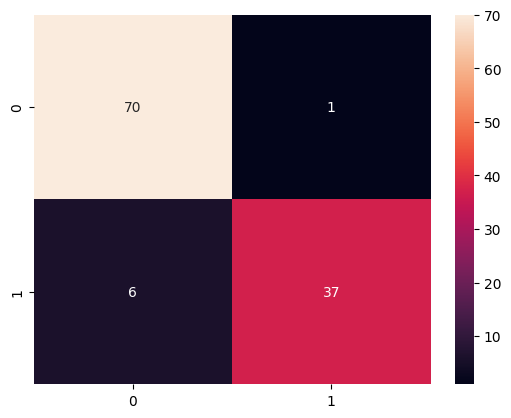

In [168]:
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot = True)

In [169]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.97      0.86      0.91        43

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In case of breast cancer - our goal should be to decrease False Negatives - reducing Recall for having cancer - which is 0.86 without hyperparameter tuning in NN

Let's true automated Hyperparameter tuning and see if we can increase the recall %?

In [180]:
#automating hyperparameters
#no of neurons in each layer
#no of hidden layers
#optimiser type
#dropout layer - p rate


#using building a model and adding that model in a tuner object

def build_model(hp):

  model = Sequential()

  callbacks = EarlyStopping(monitor = 'val_accuracy',
                          min_delta = 0.01,
                          patience = 20,
                          verbose = 1, mode = 'auto',
                          baseline = None,
                          restore_best_weights = False)

  counter = 0

  for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):

    if counter ==0:

      model.add(Dense(hp.Int('units' + str(i), min_value = 30, max_value = 300, step = 30),
                    activation =  hp.Choice('activation' + str(i),values = ['sigmoid', 'relu', 'tanh']),
                    input_dim = 30
                    ))

      model.add(Dropout(rate = hp.Choice('dropout'+ str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
      #model.add(BatchNormalization())


    else :

      model.add(Dense(hp.Int('units' + str(i), min_value = 30, max_value = 300, step = 30),
                    activation =  hp.Choice('activation' + str(i),values = ['sigmoid', 'relu', 'tanh'])
                    ))

      model.add(Dropout(rate = hp.Choice('dropout'+ str(i), values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
      #model.add(BatchNormalization())

      counter = counter + 1

  model.add(Dense(1, activation= 'sigmoid'))

  model.compile(optimizer = hp.Choice('optimizer', values = ['adam', 'adagrad', 'rmsprop']),
                loss = 'binary_crossentropy', metrics = ['accuracy'])
  return model





In [182]:
tuner = kt.RandomSearch(build_model, objective = 'val_accuracy', max_trials = 5, directory = 'breastcancer')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [183]:
tuner.search(X_train_scaled, Y_train, epochs = 10, validation_data = [X_test_scaled, Y_test])

Trial 5 Complete [00h 00m 05s]
val_accuracy: 0.8684210777282715

Best val_accuracy So Far: 0.9736841917037964
Total elapsed time: 00h 00m 35s


In [185]:
tuner.get_best_hyperparameters()[0].values


#nu of layers - 8, best optimiser - rmsprop
#unit - 120 in first layer - activation = tanh , dropout - 0.7 ,


{'num_layers': 8,
 'units0': 120,
 'activation0': 'tanh',
 'dropout0': 0.7,
 'optimizer': 'rmsprop',
 'units1': 180,
 'activation1': 'tanh',
 'dropout1': 0.1,
 'units2': 60,
 'activation2': 'sigmoid',
 'dropout2': 0.6,
 'units3': 270,
 'activation3': 'tanh',
 'dropout3': 0.1,
 'units4': 240,
 'activation4': 'tanh',
 'dropout4': 0.6,
 'units5': 180,
 'activation5': 'relu',
 'dropout5': 0.7,
 'units6': 60,
 'activation6': 'sigmoid',
 'dropout6': 0.1,
 'units7': 120,
 'activation7': 'relu',
 'dropout7': 0.4,
 'units8': 270,
 'activation8': 'tanh',
 'dropout8': 0.9}

In [187]:
model_hp = tuner.get_best_models(num_models =1 )[0]

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [188]:
model_hp.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 120)                 │           3,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 180)                 │          21,780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │          10,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 270)                 │          16,470 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 270)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 240)                 │          65,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 240)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 180)                 │          43,380 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 60)                  │          10,860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 120)                 │           7,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,551 (701.37 KB)

 Trainable params: 179,551 (701.37 KB)

 Non-trainable params: 0 (0.00 B)

In [195]:
history = model_hp.fit(X_train_scaled, Y_train, epochs = 100, validation_data = [X_test_scaled, Y_test], initial_epoch = 11,
             callbacks = callbacks)


Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9853 - loss: 0.0830 - val_accuracy: 0.9474 - val_loss: 0.3209
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9764 - loss: 0.0993 - val_accuracy: 0.9474 - val_loss: 0.3068
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9823 - loss: 0.1012 - val_accuracy: 0.9649 - val_loss: 0.2697
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9796 - loss: 0.0918 - val_accuracy: 0.9649 - val_loss: 0.2668
Epoch 16/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9879 - loss: 0.0630 - val_accuracy: 0.9649 - val_loss: 0.2548
Epoch 17/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9862 - loss: 0.0669 - val_accuracy: 0.9474 - val_loss: 0.2891
Epoch 18/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9896 - loss: 0.0534 - val_accuracy: 0.9649 - val_loss: 0.2731
Epoch 19/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9902 - loss: 0.0589 - val_accur

Stopped at 31th epoch (with patience of 20) where validation accuracy is 0.97

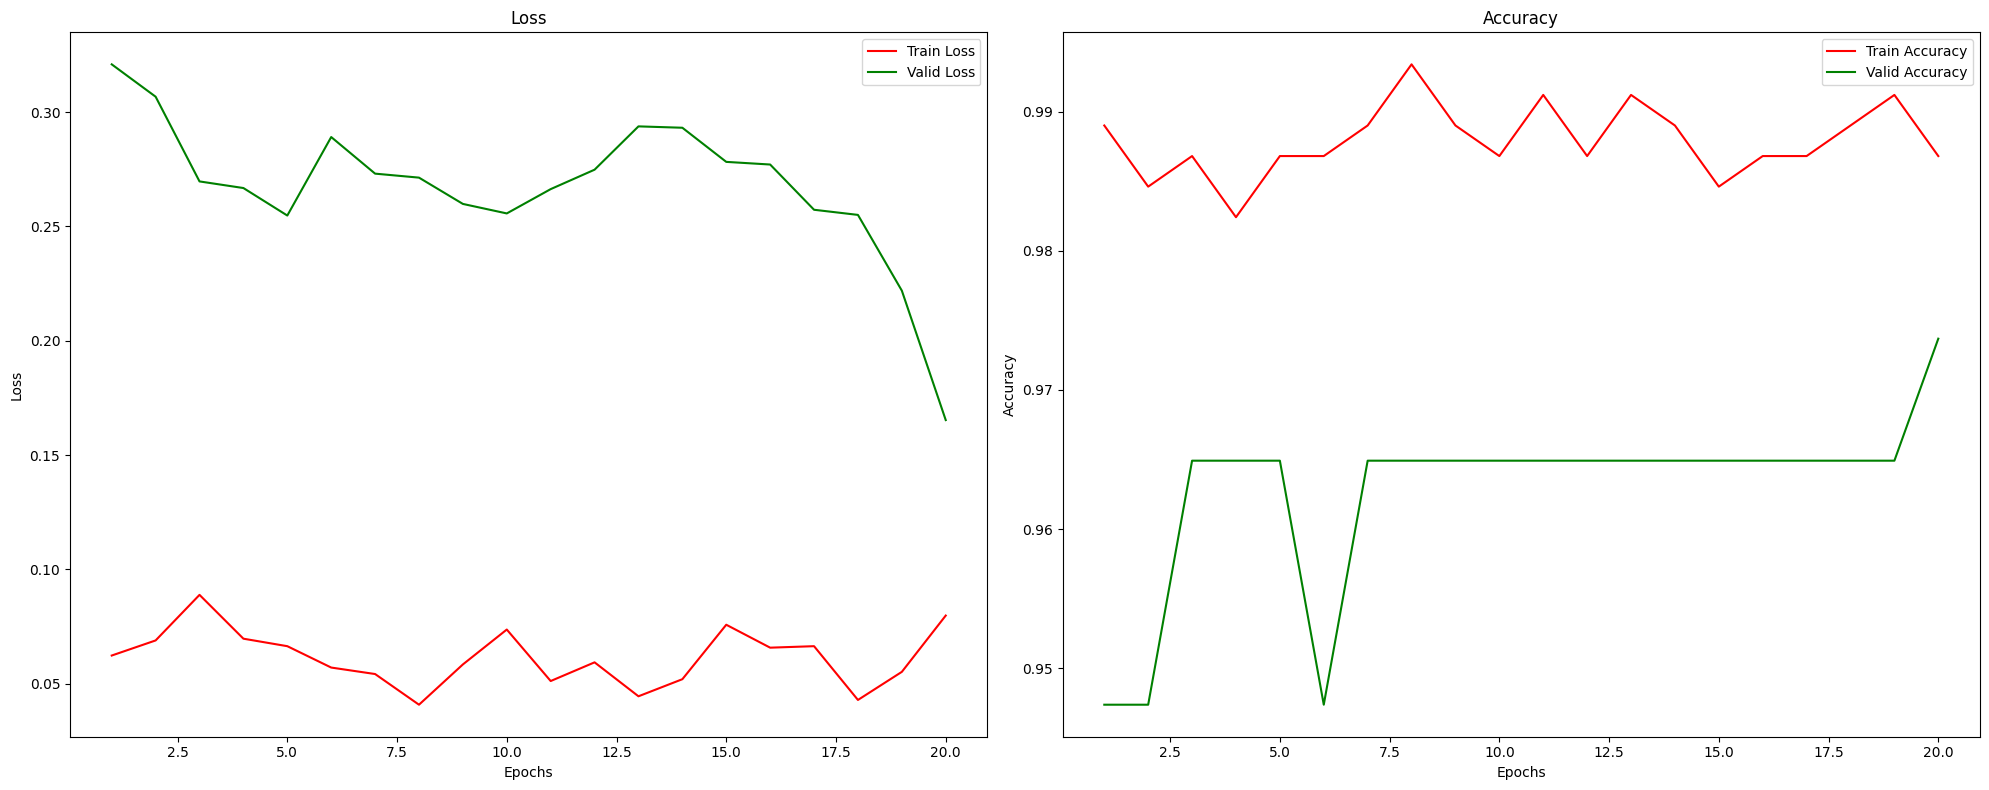

In [196]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [197]:
y_prob = model_hp.predict(X_test_scaled)
y_prob

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step


array([[0.00701946],
       [0.0070195 ],
       [0.999619  ],
       [0.999619  ],
       [0.00701946],
       [0.999619  ],
       [0.999619  ],
       [0.99961776],
       [0.00701947],
       [0.00701946],
       [0.00702003],
       [0.00701946],
       [0.00701947],
       [0.00701954],
       [0.00701948],
       [0.99961895],
       [0.99961865],
       [0.00701947],
       [0.00701946],
       [0.9996189 ],
       [0.9996186 ],
       [0.00701953],
       [0.999619  ],
       [0.999619  ],
       [0.00701946],
       [0.00701946],
       [0.999619  ],
       [0.00701946],
       [0.00701946],
       [0.999619  ],
       [0.99961895],
       [0.00702246],
       [0.00701946],
       [0.00701952],
       [0.00701946],
       [0.00701951],
       [0.00701946],
       [0.00705617],
       [0.00701946],
       [0.9996189 ],
       [0.999619  ],
       [0.999619  ],
       [0.00701948],
       [0.9992512 ],
       [0.00701947],
       [0.00701947],
       [0.999619  ],
       [0.007

In [198]:
y_pred = np.where(y_prob > 0.5, 1, 0)
y_pred

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [199]:
accuracy_score(y_pred, Y_test)

0.9736842105263158

<Axes: >

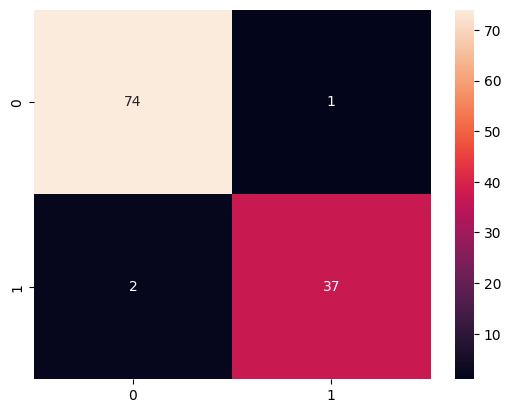

In [201]:
cm = confusion_matrix(y_pred, Y_test)
sns.heatmap(cm, annot = True)

In [203]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In case of breast cancer - our goal should be to decrease False Negatives - reducing Recall for having cancer - which is 0.86 without hyperparameter tuning in NN but 0.95 with hyperparameter tuning - only 2 False negatives were identfied (model said not have cancer while actually patient had cancer)

In [206]:
loaded_model = model.save('model_hp.keras')

#save model

In [208]:
from keras.models import load_model

# # Load the previously saved model
# loaded_model = load_model('model_hp.keras')

# # Now you can use this loaded model for predictions or further training


model_load = load_model('model_hp.keras')
model_load.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                     │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_83 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_47 (Dropout)                 │ (None, 15)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_84 (Dense)                     │ (None, 1)                   │              16 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,824 (11.04 KB)

 Trainable params: 1,411 (5.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,413 (5.52 KB)

In [278]:

# Get user input for the patient number
user_input = int(input('Enter the patient number: '))


# Print the actual value from Y_test for that patient
print('Actual prediction for that patient if they have cancer: ', Y_test.iloc[user_input])


# Reshape the patient data to be 2D (model.predict expects a 2D array)
patient_data = np.expand_dims(X_test_scaled[user_input, :], axis=0)
#model.predict(X_test_scaled) works because it is in (num of rows, num of features) - shape
#but while giving one row it is (num of patient, features which is 30 features) - (1,30 diff columns ) - 31 columns - so need to redfine it to 2D (1,30)

# Use the preloaded model to make a prediction for that patient
y_prob = model_load.predict(patient_data)

# Convert the prediction probability to a binary value (0 or 1)
y_pred = np.where(y_prob > 0.5, 1, 0)

# Print the model's prediction
print('Model prediction for that patient if they have cancer: ', y_pred[0][0])  # Access the single prediction value


Enter the patient number: 26
Actual prediction for that patient if they have cancer:  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Model prediction for that patient if they have cancer:  1


Both are validating that patient doesn't have cancer - input as many patients and validate how model is performing.

In [269]:
X_test_scaled[user_input, :]

array([-0.52240688,  1.8107795 , -0.45764498, -0.51655705,  0.56527256,
        0.63991956,  0.27322589, -0.06993914,  0.51178259,  0.98841031,
        0.03799382,  1.2055373 , -0.07907336, -0.11212876,  0.72351876,
        0.77206852,  0.18795876,  0.24728002, -0.1816802 ,  0.70796848,
       -0.13082957,  2.26389039, -0.16727629, -0.19704701,  2.04410479,
        1.42127127,  0.81500806,  0.49385091,  0.52326789,  2.01676822])

In [272]:
X_test_scaled[26, :]

array([ 1.6108405 ,  0.47638032,  1.60393942,  1.60093772,  1.02214713,
        1.12010118,  1.42325049,  2.11717207,  0.98376033, -0.37275762,
        1.33789458, -0.80201158,  0.93564516,  1.35701213, -0.27242112,
        0.86316434,  0.21002151,  1.43775077,  0.27103718,  0.30074386,
        1.55356658, -0.02752152,  1.39114985,  1.52009261,  0.54568668,
        1.12349847,  0.85284171,  2.00257307,  1.18703863,  0.20492224])